# Breast Cancer Detection from Ultrasound Images using Residual Unet and its differential Analysis using Dice coefficent and Area Ratio values

❓ **About the problem** <br>
❤ Breast cancer is the most diagnosed cancer among women worldwide, accounting for 1 in 4 cancer cases.<br>
❤ Breast cancer cells usually form a tumour that can often be seen on an x-ray or felt as a lump.

📔**Introduction** <br>

The goal of **semantic image segmentation** is to label each pixel of an image with a corresponding class of what is being represented. Because we’re predicting for every pixel in the image, this task is commonly referred to as *dense prediction*.
The **output** itself is a high resolution image (typically of the same size as input image) in which each pixel is classified to a particular class.<br>

🗒 About the datset

The data collected at baseline include breast ultrasound images among women in ages between 25 and 75 years old. This data was collected in 2018. The number of patients is 600 female patients. The dataset consists of 780 images with an average image size of 500*500 pixels. The images are in PNG format. The ground truth images are presented with original images. The images are categorized into three classes, which are normal, benign, and malignant.

↪ Dataset Link : [Breast Ultrasound Image Dataset](https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset)

**Step 1: Import Libraries**

In [1]:
import os
import sys
import random

import numpy as np
import pandas as pd
import tensorflow as tf


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import layers
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD, schedules, Adam
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.models import Model, load_model
from tensorflow.python.keras import losses

from keras import backend as K

ImportError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import layers
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD, schedules, Adam
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.models import Model, load_model
from tensorflow.python.keras import losses

In [ ]:
from __future__ import print_function

import glob
from skimage.io import imsave
from keras.models import Model
from keras.layers import Lambda, Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D ,BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam, Adadelta
from keras.layers.merge import add,multiply
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
# import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
#from data import load_train_data, load_test_data
from sklearn.model_selection import train_test_split
K.set_image_data_format('channels_last')  # TF dimension ordering in this code


img_rows = 256
img_cols = 256
smooth = 1.

In [ ]:
from __future__ import print_function

import os, glob
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, Add, MaxPooling2D, Activation, Dense, Reshape, GlobalAveragePooling2D, Multiply, Conv2DTranspose, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adadelta
from keras.callbacks import ModelCheckpoint
from keras import backend as K
#from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
#from data import load_train_data, load_test_data
from sklearn.model_selection import train_test_split
K.set_image_data_format('channels_last')  # TF dimension ordering in this code

In [ ]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=43520bf4d9b2a26a84b196f0481f3696a607b52ab27fdd2bd7a9c41882bb128d
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [ ]:
import glob
import cv2
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import matplotlib.pyplot as plt
import numpy as np
import imutils
import os
import pandas as pd

**Step 2: Load Dataset**

In [ ]:
image_height = 256
image_width = 256
dpath = "../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/"
classes = ['benign', 'malignant', 'normal']

In [ ]:
output_path = "C:/Users/Jaya Tiwari/OneDrive/Documents/final_prj/predicted_mask_img"

In [ ]:
data = {'image' : [],
        'mask' : []}

**Step 3: Data Preprocessing**

In [ ]:
def load_data(path, data_obj, class_name):
    img_names_list = os.listdir(path+class_name)
    image_names = []
    mask_names = []
    names_truncated = []
    
    for i in range(len(img_names_list)):
        names_truncated.append(img_names_list[i].split(')')[0])
    
    names_truncated = list(set(names_truncated))
    for i in range(len(names_truncated)):
        image_names.append(names_truncated[i]+').png')
        mask_names.append(names_truncated[i]+')_mask.png')
    
    data_obj = preprocess_data(image_names, mask_names, image_width, image_height, path, class_name, data_obj)
        
        
    return data_obj
    

In [ ]:
def preprocess_data(image_names, mask_names, img_width, img_height, dpath, dclass, data_obj):
    for index in range (len(image_names)):
#         img = plt.imread(dpath+'/'+dclass+'/'+ image_names[index])
#         mask = plt.imread(dpath+'/'+dclass+'/'+ mask_names[index])

#         img = cv2.resize(img, (img_width, img_height)) 
#         mask = cv2.resize(mask, (img_width, img_height))
        
#         mask = np.expand_dims(mask, -1)

        image_path = dpath+'/'+dclass+'/'+ image_names[index]
        mask_path = dpath+'/'+dclass+'/'+ mask_names[index]
        
        x = cv2.imread(image_path, cv2.IMREAD_COLOR)
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
        x = np.round(cv2.resize(x, (image_height, image_width)))
        x.dtype = np.uint8
        y = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        y = cv2.resize(y, (image_height, image_width))

        x= x/255.0
        y= y/255.0
        data_obj['image'].append(x)
        data_obj['mask'].append(y)

    return data_obj

In [ ]:
data = load_data(dpath, data, classes[0]) 
ln = len(data['image'])
print("Number of benign tumor images", ln)
data = load_data(dpath, data, classes[1]) 
print("Number of malignant tumor images", len(data['image'])-ln)
print("Total images for segmentation", len(data['image']))

Number of benign tumor images 437
Number of malignant tumor images 210
Total images for segmentation 647


**Step 5: Visualization**

In [ ]:
def visualize_example(data, index = None):
    if index is None:
        index = random.randint(0, len(data['image']))
    X = data['image']
    y = data['mask']
    has_mask = y[index].max() > 0
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(X[index])
    if has_mask:
        ax[0].contour(y[index].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Image')

    ax[1].imshow(y[index].squeeze())
    ax[1].set_title('Mask')

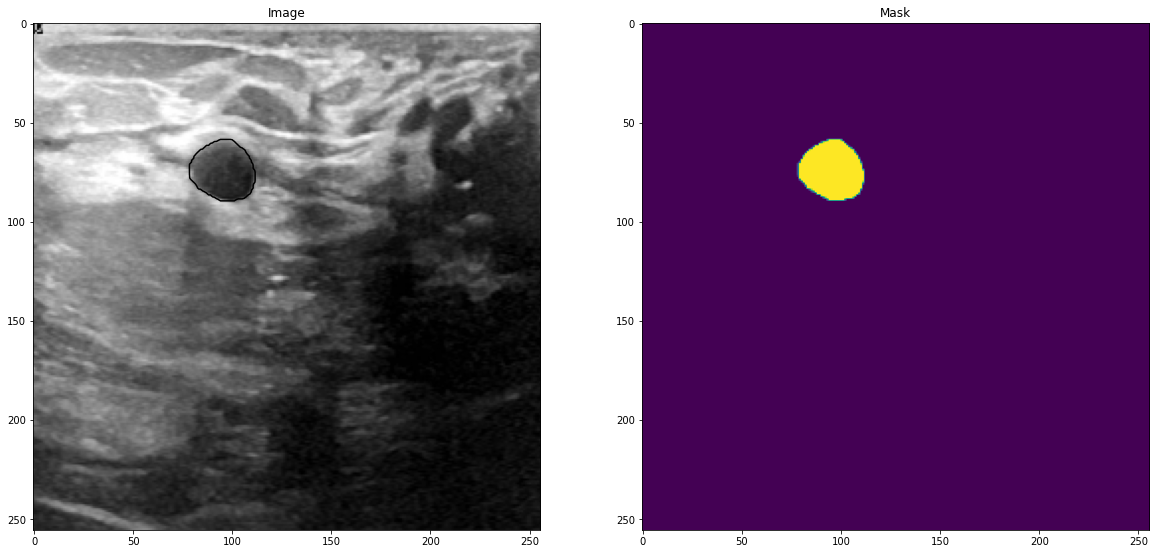

In [ ]:
visualize_example(data)

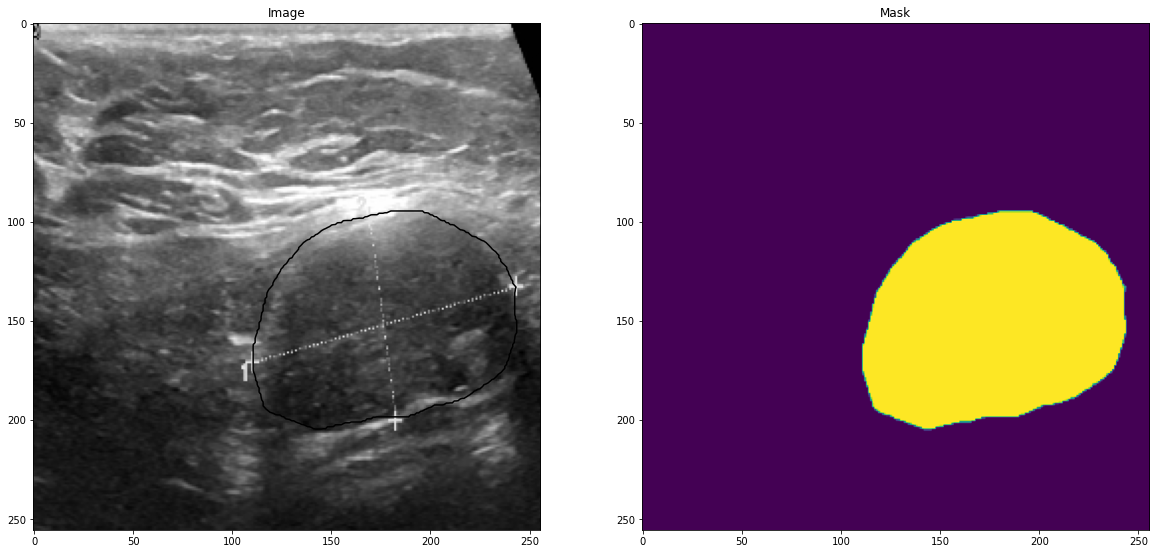

In [ ]:
visualize_example(data,index=0)

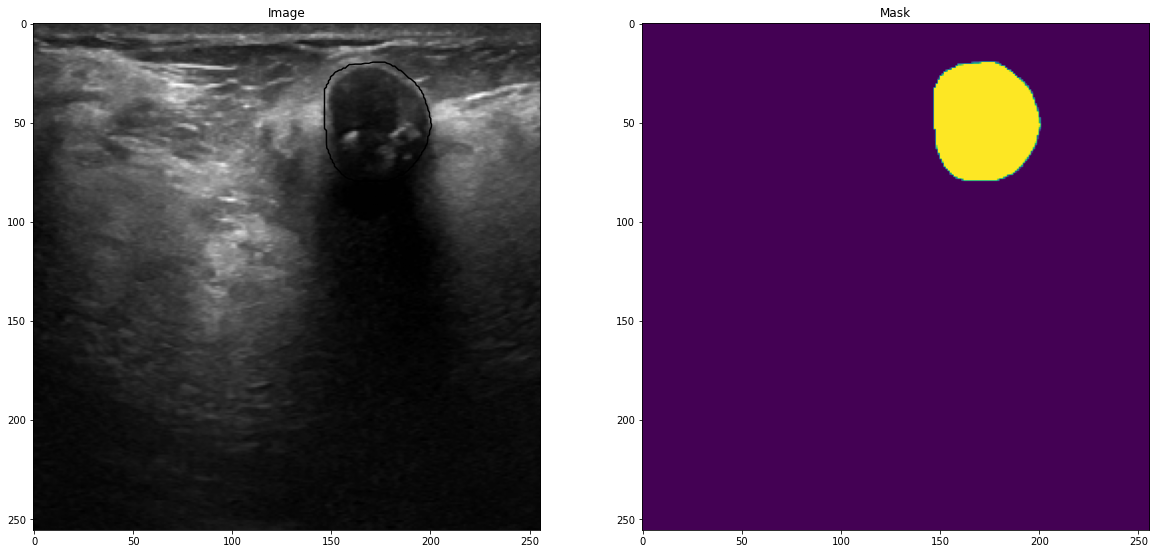

In [ ]:
visualize_example(data,index=14)

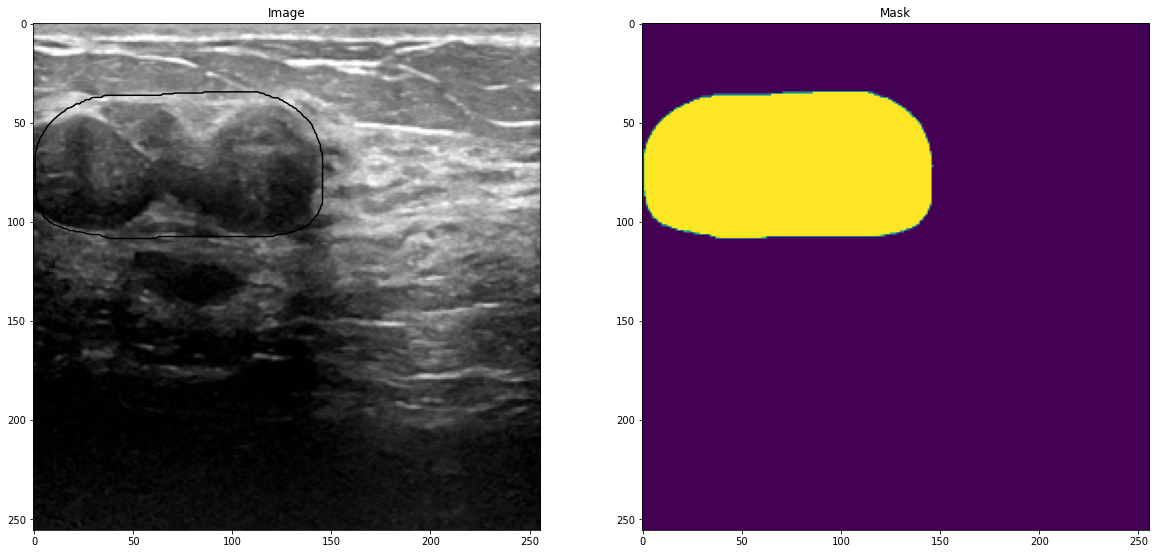

In [ ]:
visualize_example(data,index=210)

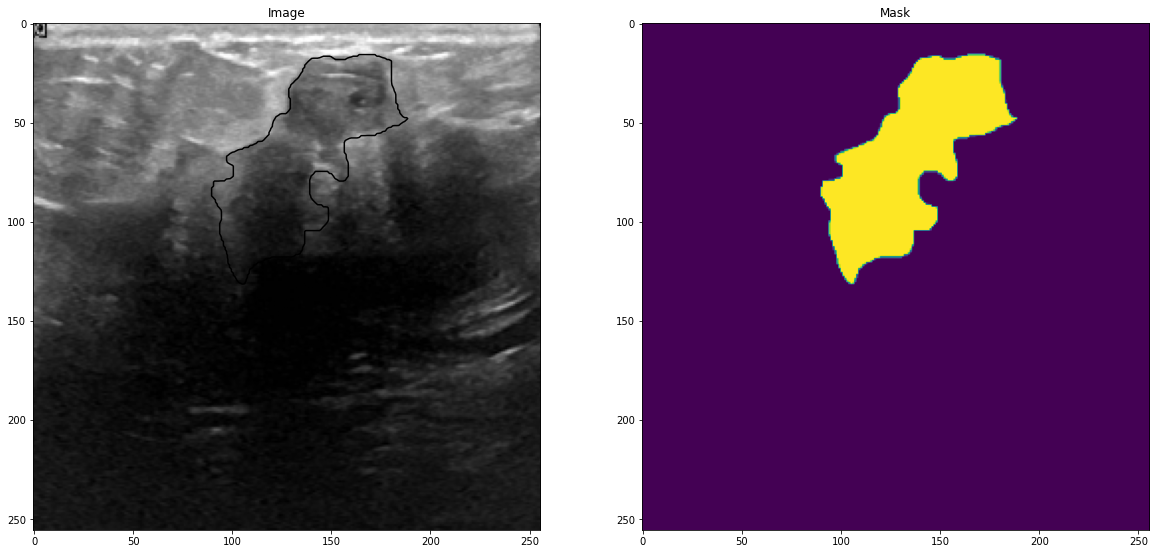

In [ ]:
visualize_example(data,index=646)

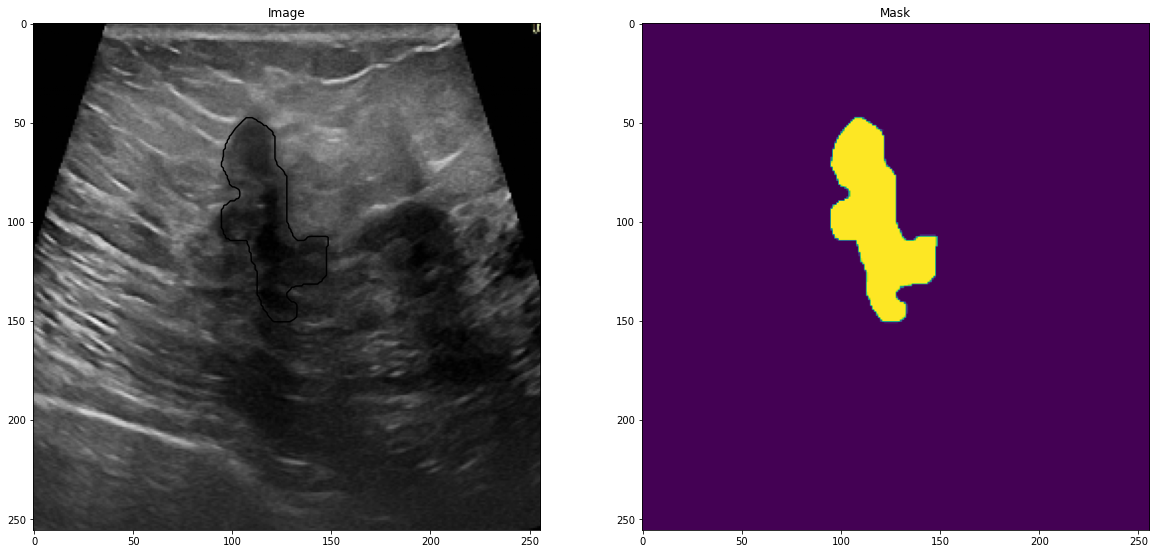

In [ ]:
visualize_example(data,index=437)

In [ ]:
data['image'] = np.array(data['image'])
data['image'].shape

(647, 256, 256, 3)

In [ ]:
data['mask'] = np.array(data['mask'])
data['mask'] =  np.expand_dims(data['mask'], -1)
data['mask'].shape

(647, 256, 256, 1)

**Step 6: Train-Test Split**

In [ ]:
# for all images 
X_train, X_valid, y_train, y_valid = train_test_split(data['image'], data['mask'], test_size=0.2, random_state=42)
print(len(X_train), len(y_train), len(X_valid), len(y_valid))

517 517 130 130


In [ ]:
from PIL import Image

**Step 7: Data Augmentation**: Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.Since the dataset only includes x images, performing data augmentation helps in preventing a neural network from learning irrelevant features. This results in better model performance.

**a)** Here we have defined a function to perform basic augmentation techniques like rotation, flipping, zooming etc.

In [ ]:
data_gen_args = dict(
    rotation_range=60,
    zoom_range=[0.6,1.0],
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode="nearest",
)

**b)** Here we are using the Keras deep learning neural network library that provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

In [ ]:
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
seed = 1

In [ ]:
image_datagen.fit(X_train, augment=True, seed=seed)

In [ ]:
mask_datagen.fit(y_train, augment=True, seed=seed)

**Step 8: Fitting and Creating Train Generator**

In [ ]:
image_generator = image_datagen.flow(
    X_train,
    batch_size = 16,
    seed=seed)
mask_generator = mask_datagen.flow(
    y_train,
    batch_size = 16,
    seed=seed)

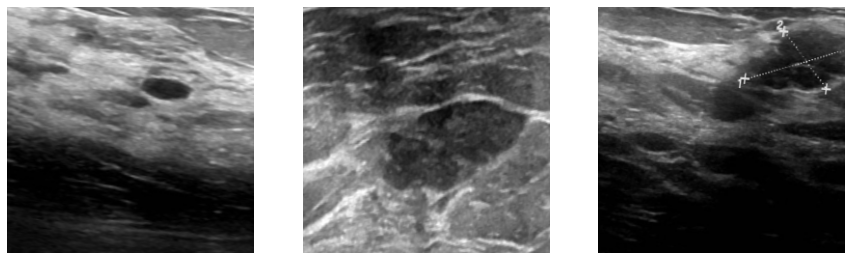

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(image_generator)[0]
    ax[i].imshow(image)
    ax[i].axis('off')

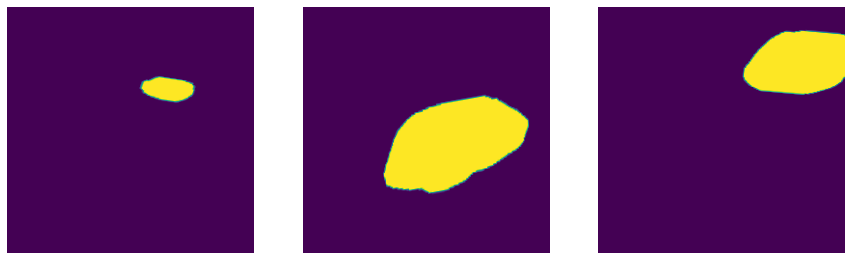

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(mask_generator)[0]
    ax[i].imshow(image)
    ax[i].axis('off')

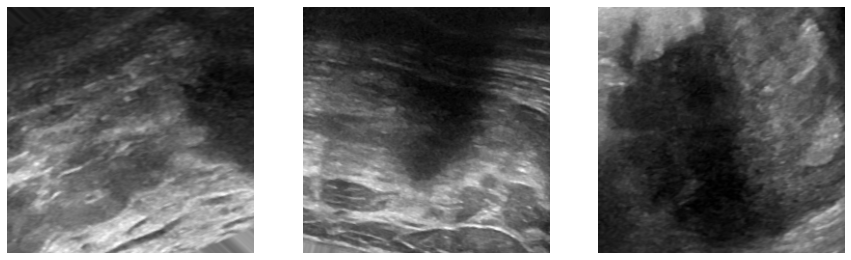

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(image_generator)[1]
    ax[i].imshow(image)
    ax[i].axis('off')

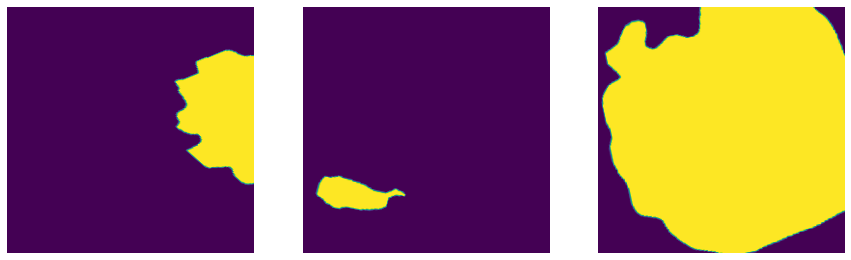

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(mask_generator)[1]
    ax[i].imshow(image)
    ax[i].axis('off')

In [ ]:
train_generator = zip(image_generator, mask_generator)

In [ ]:
tf.keras.backend.clear_session()

**Step 9: Defining Loss Functions** In cross entropy loss, the loss is calculated as the average of per-pixel loss, and the per-pixel loss is calculated discretely, without knowing whether its adjacent pixels are boundaries or not.As a result, cross entropy loss only considers loss in a micro sense rather than considering it globally, which is not enough for image level prediction.<br>
![](https://miro.medium.com/max/1050/1*VMiADFOL7x0R9U32qK-C6Q.png)

**Dice loss** originates from *Sørensen–Dice coefficient*, which is a statistic developed in 1940s to gauge the similarity between two samples.Dice loss considers the loss information both locally and globally, which is critical for high accuracy.<br>
![](https://miro.medium.com/max/386/1*EF3VCtk-VbTIKhriaQF0YQ.png)<br>
Here,<br>
**pi,gi** : pairs of corresponding pixel values of prediction and ground truth<br>
*In boundary detection scenario, the values of pi and gi are either 0 or 1, representing whether the pixel is boundary (value of 1) or not (value of 0).*<br>
Therefore, the denominator is the sum of total boundary pixels of both prediction and ground truth, and the numerator is the sum of correctly predicted boundary pixels because the sum increments only when pi and gi match (both of value 1).

In [ ]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

In [ ]:
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

In [ ]:
def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [ ]:
def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def loss(y_true, y_pred):
    return -(0.4*dice_coef(y_true, y_pred)+0.6*iou_coef(y_true, y_pred))

**Step 10: Building U-net Model**

**About U-net:** The UNET was developed by Olaf Ronneberger et al. for Bio Medical Image Segmentation. <br>
The architecture contains two paths. First path is the contraction path (also called as the encoder) which is used to capture the context in the image. The encoder is just a traditional stack of convolutional and max pooling layers. The second path is the symmetric expanding path (also called as the decoder) which is used to enable precise localization using transposed convolutions. Thus it is an end-to-end fully convolutional network (FCN), i.e. it only contains Convolutional layers and does not contain any Dense layer because of which it can accept image of any size.<br>
![](https://www.researchgate.net/publication/331406702/figure/fig2/AS:731276273262594@1551361258173/Illustration-of-the-U-net-architecture-The-figure-illustrates-the-U-net-architecture.png)

In [ ]:
# Residual UNet blocks

In [ ]:
from keras.layers.merge import concatenate, add

In [ ]:
def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x

In [ ]:
def resnet_block(x, n_filter, strides=1):
    x_init = x
    ## Conv 1
    #x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(n_filter, (3, 3), padding="same", strides=strides)(x)
    ## Conv 2
    #x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(n_filter, (3, 3), padding="same", strides=1)(x)
    ## Shortcut
    s  = Conv2D(n_filter, (1, 1), padding="same", strides=strides)(x_init)
    s = BatchNormalization()(s)
    ## Add
    x = Add()([x, s])
    x = squeeze_excite_block(x)
    return x

In [ ]:
def get_runet():    
    inputs = Input((img_rows, img_cols, 3))
    
    conv1 = resnet_block(inputs,32 , strides=1)
    conv1 = tf.keras.layers.Dropout(0.1)(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = resnet_block(pool1,64 , strides=1)
    conv2 = tf.keras.layers.Dropout(0.1)(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = resnet_block(pool2, 128, strides=1)
    conv3 = tf.keras.layers.Dropout(0.2)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = resnet_block(pool3, 256, strides=1)
    conv4 = tf.keras.layers.Dropout(0.2)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = tf.keras.layers.Dropout(0.3)(conv5)
    
    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = resnet_block(up6, 256, strides=1)
    conv6 = tf.keras.layers.Dropout(0.2)(conv6)
    
    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = resnet_block(up7, 128, strides=1)
    conv7 = tf.keras.layers.Dropout(0.2)(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = resnet_block(up8, 64, strides=1)
    conv8 = tf.keras.layers.Dropout(0.1)(conv8)
    
    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = resnet_block(up9, 32, strides=1)
    conv9 = tf.keras.layers.Dropout(0.1)(conv9)
            
    conv9 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv9])
    model.compile(optimizer=Adam(), loss=[loss], metrics=[dice_coef, iou_coef])
    return model


In [ ]:
img_rows = 256
img_cols = 256

**Step 11: Setting up Hyperparameters**

In [ ]:
input_layer= Input((image_height, image_width, 3), name='img')
unet_model = get_runet()
unet_model.summary()

2022-11-10 07:05:31.354581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 07:05:31.355622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 07:05:31.503694: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 07:05:31.504562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 07:05:31.505318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         activation[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 32) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:

unet_model.compile(Adam(learning_rate=0.001),
                  loss= bce_dice_loss,
                  metrics=[dice_loss, dice_coeff, iou_coef,'accuracy'])

In [ ]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0003, verbose=1),
    ModelCheckpoint('model-checkpoint.h5', verbose=1, save_best_only=True, save_weights_only=True) ]

In [ ]:
batch_size = 4
epochs = 50
#batch_size = 2
#epochs = 5

**Step 12: Training the model**

In [ ]:
model_history = unet_model.fit(train_generator,  
                    batch_size=batch_size, 
                    steps_per_epoch=int(np.ceil(len(X_train) / float(batch_size))),
                    epochs=epochs, 
                    callbacks=callbacks,
                    validation_data=(X_valid, y_valid),
                    verbose = 1)

2022-11-10 07:05:36.190946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-11-10 07:05:41.812716: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


130/130 [==============================] - 88s 526ms/step - loss: 1.0815 - dice_loss: 0.6915 - dice_coeff: 0.3085 - iou_coef: 0.1601 - accuracy: 0.8483 - val_loss: 1.0195 - val_dice_loss: 0.7664 - val_dice_coeff: 0.2336 - val_iou_coef: 0.1231 - val_accuracy: 0.9057

Epoch 00001: val_loss improved from inf to 1.01954, saving model to model-checkpoint.h5
Epoch 2/50
130/130 [==============================] - 62s 475ms/step - loss: 0.9516 - dice_loss: 0.6072 - dice_coeff: 0.3928 - iou_coef: 0.2172 - accuracy: 0.8676 - val_loss: 0.8595 - val_dice_loss: 0.6366 - val_dice_coeff: 0.3634 - val_iou_coef: 0.2131 - val_accuracy: 0.9187

Epoch 00002: val_loss improved from 1.01954 to 0.85948, saving model to model-checkpoint.h5
Epoch 3/50
130/130 [==============================] - 62s 473ms/step - loss: 0.9186 - dice_loss: 0.5797 - dice_coeff: 0.4203 - iou_coef: 0.2304 - accuracy: 0.8707 - val_loss: 0.9585 - val_dice_loss: 0.6730 - val_dice_coeff: 0.3270 - val_iou_coef: 0.2000 - val_accuracy: 0.911

**Step 13: Learning Curve Visualization**


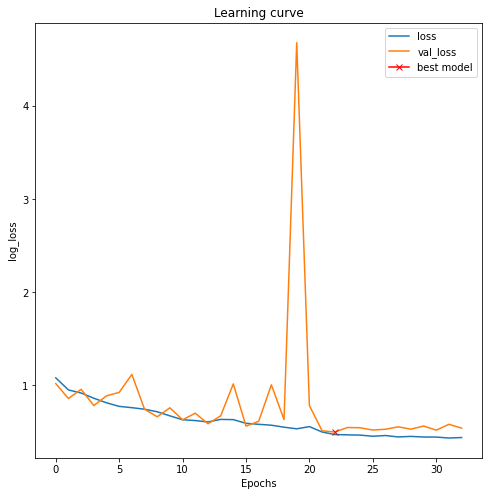

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model_history.history["loss"], label="loss")
plt.plot(model_history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(model_history.history["val_loss"]), np.min(model_history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

**Step 14: Evaluating the model on test sets**

In [ ]:
unet_model.load_weights('model-checkpoint.h5')
unet_model.evaluate(X_valid, y_valid, verbose=1)

5/5 [==============================] - 7s 200ms/step - loss: 0.4840 - dice_loss: 0.3224 - dice_coeff: 0.6776 - iou_coef: 0.5185 - accuracy: 0.9441


[0.4840284287929535,
 0.32237380743026733,
 0.6776262521743774,
 0.518534779548645,
 0.9440720677375793]

In [ ]:
ev = unet_model.evaluate(X_valid, y_valid, verbose=1)

5/5 [==============================] - 1s 203ms/step - loss: 0.4840 - dice_loss: 0.3224 - dice_coeff: 0.6776 - iou_coef: 0.5185 - accuracy: 0.9441


In [ ]:
print(ev[1])

0.32237380743026733


In [ ]:
preds_test = unet_model.predict(X_valid, verbose=1)
preds_test_t = (preds_test > 0.75).astype(np.uint8)

5/5 [==============================] - 2s 198ms/step


**Step 15: Manual Testing**

In [ ]:
import io
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def mask_ratio(img):
    cv2.imwrite('a.png',img)
    img = cv2.imread('a.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
    pixels = cv2.countNonZero(thresh)
    image_area = img.shape[0] * img.shape[1]
    area_ratio = (pixels / image_area) * 100
    return area_ratio

In [ ]:

def plot_sample(X, y, preds, binary_preds, ix=None):
    area = []
    index = []
    if ix is None:
        ix = random.randint(0, len(X))
    print("test image:",ix)
    has_mask = y[ix].max() > 0
    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix])
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Image')

    ax[1].imshow(y[ix].squeeze())
    print("mask image is: ",ax[1].imshow(y[ix].squeeze()))
    ax[1].set_title('Mask')
    
    ratio = mask_ratio(y[ix])
    print("area ratio of ground truth",ratio)

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    ax[2].set_title('Mask Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    ax[3].set_title('Mask Predicted binary');
    
    ratio1 = mask_ratio(preds[ix])
    print("area ratio of mask predicted by model",ratio1)
    
    area_ratio_mask.append(ratio)
    area_ratio_pred_mask.append(ratio1)
    index.append(i)

In [ ]:

def plot_sample1(X, y, preds, binary_preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))
    #print("test image:",ix)
    has_mask = y[ix].max() > 0
    #fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    #ax[0].imshow(X[ix])
    #if has_mask:
    #    ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    #ax[0].set_title('Image')

    #ax[1].imshow(y[ix].squeeze())
    #print("mask image is: ",ax[1].imshow(y[ix].squeeze()))
    #ax[1].set_title('Mask')
    
    ratio = mask_ratio(y[ix])
    #print("area ratio of ground truth",ratio)

    #ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    #ax[2].set_title('Mask Predicted')
    
    #ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    #ax[3].set_title('Mask Predicted binary');
    
    ratio1 = mask_ratio(preds[ix])
    #print("area ratio of mask predicted by model",ratio1)
    #print(preds[ix])
    pred_mask_img.append(preds[ix])
    
    area_ratio_mask.append(ratio)
    area_ratio_pred_mask.append(ratio1)
    index.append(i)

In [ ]:
pred_mask_img = []
area_ratio_mask = []
area_ratio_pred_mask = []
index = []
for i in range (0,len(X_valid)):
    plot_sample1(X_valid, y_valid, preds_test, preds_test_t,ix=i)
    

In [ ]:
# create a dataframe from the lists
df_final = pd.DataFrame(data=zip(index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img), columns=['Index','area_ratio_mask','area_ratio_pred_mask','pred_mask_img'])


In [ ]:
df_final.to_csv(r'C:\Users\Jaya Tiwari\OneDrive\Documents\final_prj\base_unet.csv')

# create a dataframe from the lists


In [ ]:
df_final

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img
0,0,3.906250,1.432800,"[[[0.023803415], [0.0070656454], [0.012744132]..."
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0..."
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]..."
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650..."
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ..."
...,...,...,...,...
125,125,17.041016,15.812683,"[[[0.046902105], [0.0031590597], [0.005704436]..."
126,126,4.034424,2.162170,"[[[0.0014261791], [0.0005006512], [0.000972999..."
127,127,18.766785,13.729858,"[[[0.08141604], [0.0022973807], [0.0024522487]..."
128,128,1.348877,3.565979,"[[[0.043901563], [0.0043614293], [0.013525269]..."


test image: 86
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 0.75836181640625
area ratio of mask predicted by model 5.1513671875


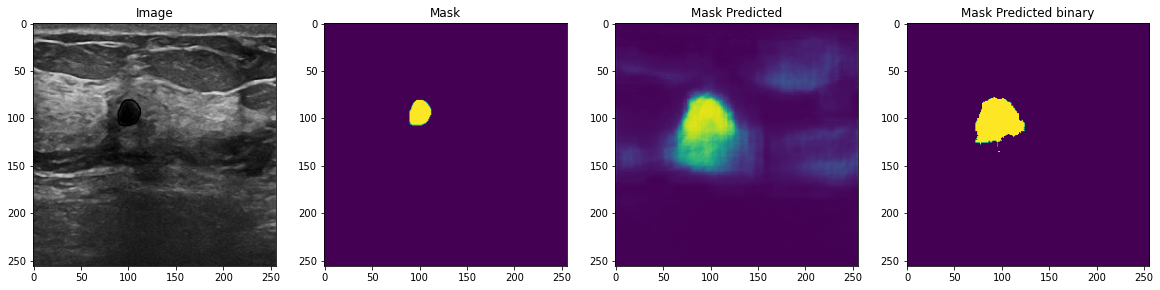

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t,ix=86)

test image: 83
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 11.62109375
area ratio of mask predicted by model 7.38983154296875


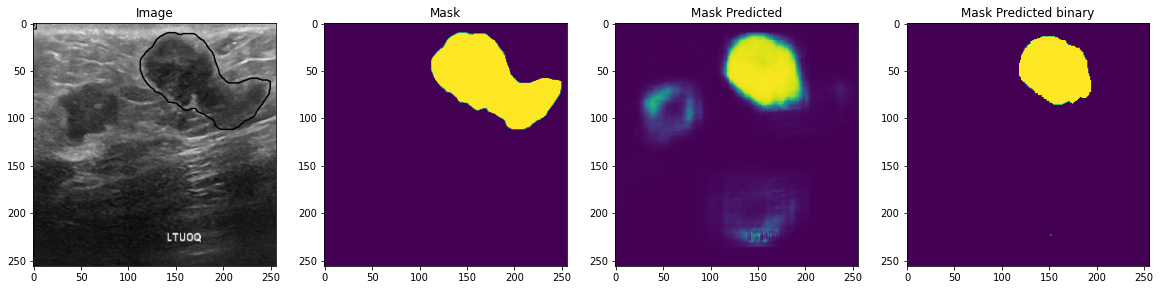

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t,ix=83)

test image: 84
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 8.00323486328125
area ratio of mask predicted by model 9.48028564453125


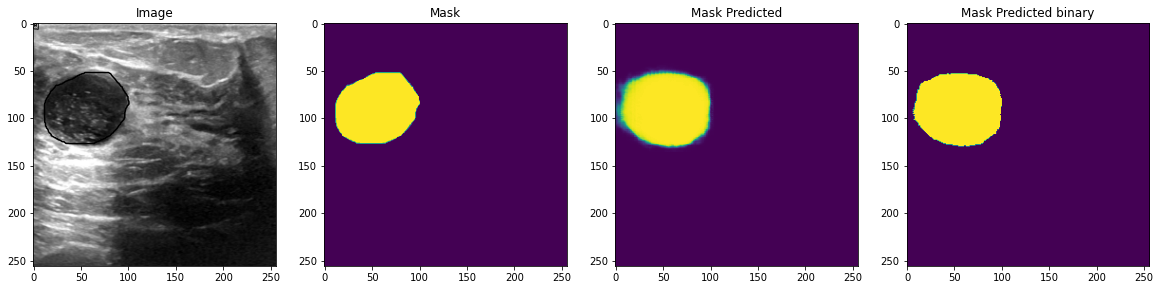

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t,ix=84)

test image: 85
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 1.959228515625
area ratio of mask predicted by model 2.33306884765625


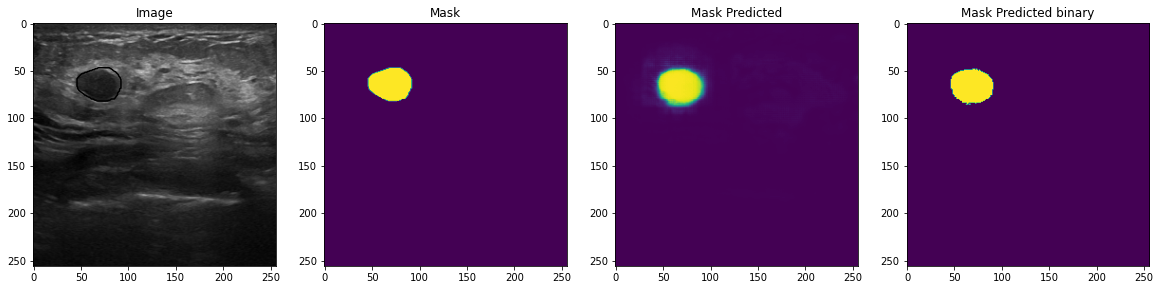

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t,ix=85)

test image: 104
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 2.4078369140625
area ratio of mask predicted by model 2.8717041015625


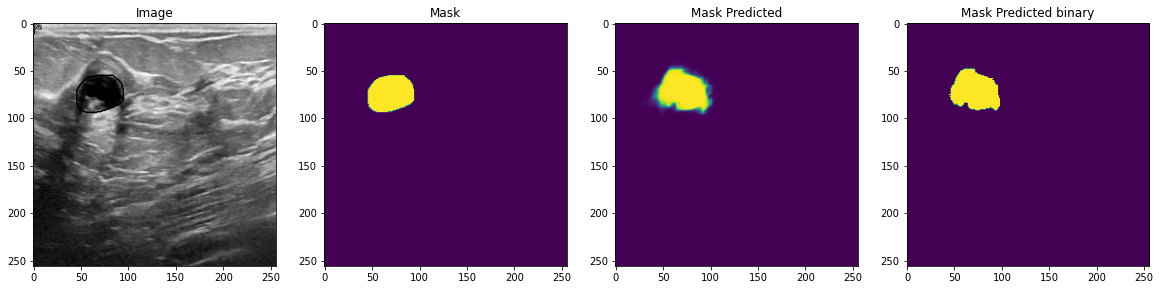

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t)

test image: 47
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 0.88043212890625
area ratio of mask predicted by model 2.6885986328125


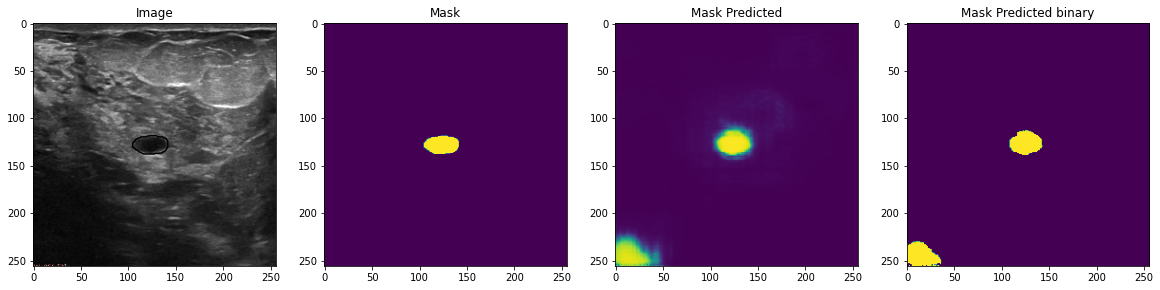

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t,ix=47)

test image: 117
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 14.8468017578125
area ratio of mask predicted by model 16.52679443359375


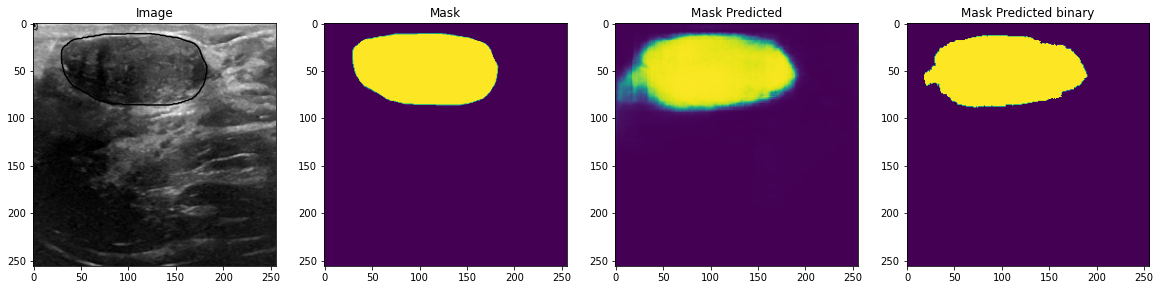

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t)

test image: 98
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 2.37884521484375
area ratio of mask predicted by model 2.5390625


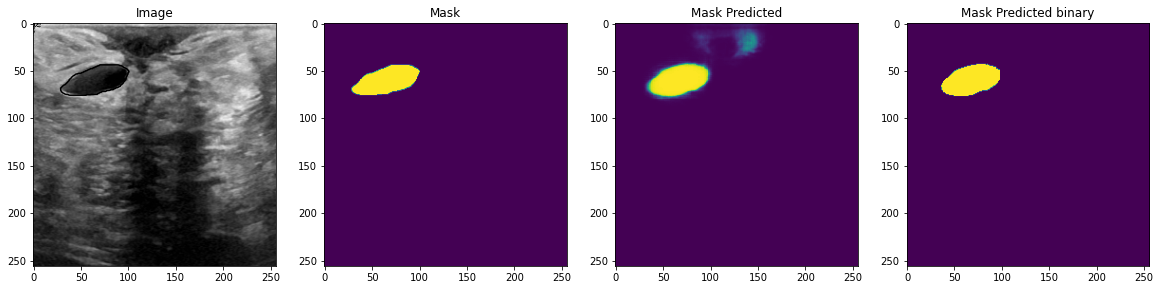

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t)

test image: 78
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 1.8585205078125
area ratio of mask predicted by model 2.07366943359375


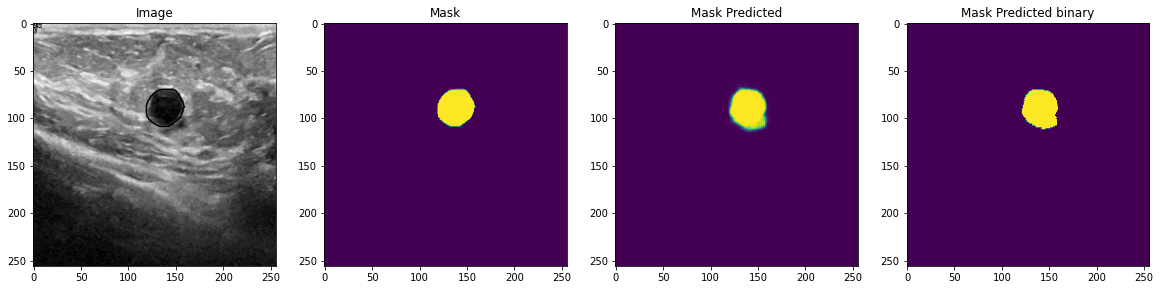

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t)

test image: 40
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 1.07574462890625
area ratio of mask predicted by model 2.83966064453125


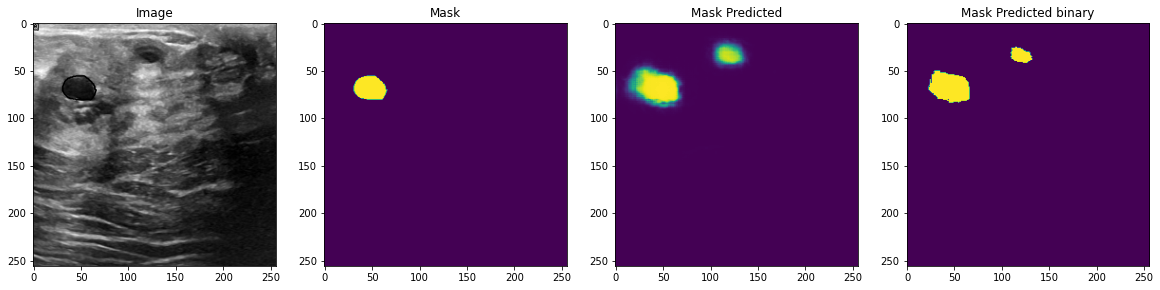

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t)

test image: 78
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 1.8585205078125
area ratio of mask predicted by model 2.07366943359375


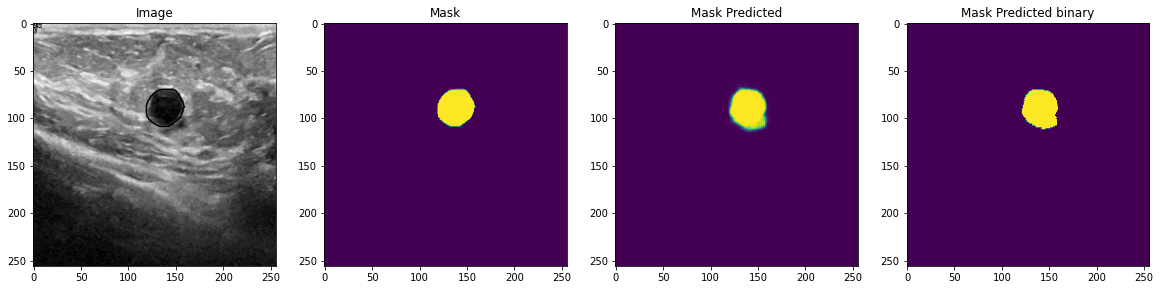

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t)

test image: 54
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 0.885009765625
area ratio of mask predicted by model 1.88140869140625


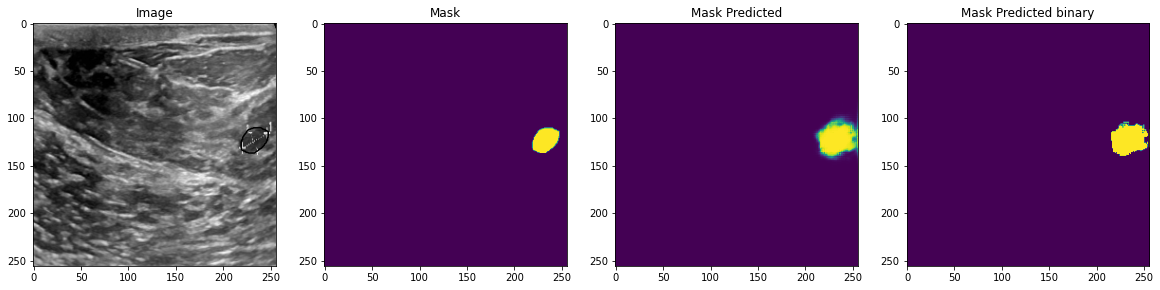

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t)

test image: 13
mask image is:  AxesImage(471.13,90;242.609x543.6)
area ratio of ground truth 6.787109375
area ratio of mask predicted by model 7.0281982421875


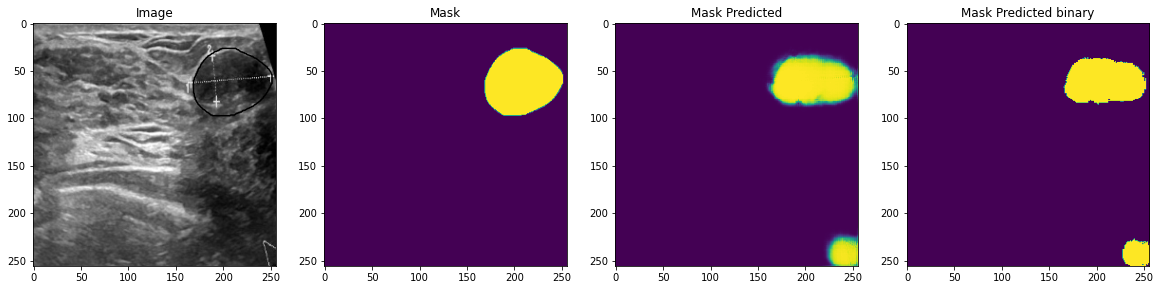

In [ ]:
plot_sample(X_valid, y_valid, preds_test, preds_test_t)

# phase 2 overlay approach for determining weather the tumour is progressing or regressing by analysing the dice coefficient of two consecutive scans.


In [ ]:
df_final['diff_area_ratio_pred'] = df_final['area_ratio_pred_mask']- df_final['area_ratio_pred_mask'].shift()
df_final

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred
0,0,3.906250,1.432800,"[[[0.023803415], [0.0070656454], [0.012744132]...",NaN
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337
...,...,...,...,...,...
125,125,17.041016,15.812683,"[[[0.046902105], [0.0031590597], [0.005704436]...",-9.645081
126,126,4.034424,2.162170,"[[[0.0014261791], [0.0005006512], [0.000972999...",-13.650513
127,127,18.766785,13.729858,"[[[0.08141604], [0.0022973807], [0.0024522487]...",11.567688
128,128,1.348877,3.565979,"[[[0.043901563], [0.0043614293], [0.013525269]...",-10.163879


In [ ]:
df_final['diff_area_ratio_pred']=df_final['diff_area_ratio_pred'].replace(to_replace=np.NaN,value=0)
df_final

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred
0,0,3.906250,1.432800,"[[[0.023803415], [0.0070656454], [0.012744132]...",0.000000
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337
...,...,...,...,...,...
125,125,17.041016,15.812683,"[[[0.046902105], [0.0031590597], [0.005704436]...",-9.645081
126,126,4.034424,2.162170,"[[[0.0014261791], [0.0005006512], [0.000972999...",-13.650513
127,127,18.766785,13.729858,"[[[0.08141604], [0.0022973807], [0.0024522487]...",11.567688
128,128,1.348877,3.565979,"[[[0.043901563], [0.0043614293], [0.013525269]...",-10.163879


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 130 non-null    int64  
 1   area_ratio_mask       130 non-null    float64
 2   area_ratio_pred_mask  130 non-null    float64
 3   pred_mask_img         130 non-null    object 
 4   diff_area_ratio_pred  130 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
df_da = df_final.loc[[1,2,3,4,5,6]]

In [ ]:
def dice_coef(image1, image2):
    smooth = 1.
    # Flatten
    image1_f = tf.reshape(image1, [-1])
    image2_f = tf.reshape(image2, [-1])
    intersection = tf.reduce_sum(image1_f * image2_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(image1_f) + tf.reduce_sum(image2_f) + smooth)
    score = np.array(score)
    return score

In [ ]:
dice = []
for i in range(0,(len(df_final)-1)):
    dice_s = dice_coef(df_final.iloc[i]['pred_mask_img'],df_final.iloc[i+1]['pred_mask_img'])
    dice.append(dice_s)
    df_final.loc[i+1, 'Dice_Score'] =(dice_s)

In [ ]:
df_final

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred,Dice_Score
0,0,3.906250,1.432800,"[[[0.023803415], [0.0070656454], [0.012744132]...",0.000000,NaN
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689,0.024452
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963,0.065890
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211,0.000808
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337,0.002014
...,...,...,...,...,...,...
125,125,17.041016,15.812683,"[[[0.046902105], [0.0031590597], [0.005704436]...",-9.645081,0.447999
126,126,4.034424,2.162170,"[[[0.0014261791], [0.0005006512], [0.000972999...",-13.650513,0.008956
127,127,18.766785,13.729858,"[[[0.08141604], [0.0022973807], [0.0024522487]...",11.567688,0.181462
128,128,1.348877,3.565979,"[[[0.043901563], [0.0043614293], [0.013525269]...",-10.163879,0.021475


In [ ]:
df_final['Dice_Score']=df_final['Dice_Score'].replace(to_replace=np.NaN,value=0)
df_final

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred,Dice_Score
0,0,3.906250,1.432800,"[[[0.023803415], [0.0070656454], [0.012744132]...",0.000000,0.000000
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689,0.024452
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963,0.065890
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211,0.000808
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337,0.002014
...,...,...,...,...,...,...
125,125,17.041016,15.812683,"[[[0.046902105], [0.0031590597], [0.005704436]...",-9.645081,0.447999
126,126,4.034424,2.162170,"[[[0.0014261791], [0.0005006512], [0.000972999...",-13.650513,0.008956
127,127,18.766785,13.729858,"[[[0.08141604], [0.0022973807], [0.0024522487]...",11.567688,0.181462
128,128,1.348877,3.565979,"[[[0.043901563], [0.0043614293], [0.013525269]...",-10.163879,0.021475


In [ ]:
df_final = df_final.round({"Dice_Score":2})

In [ ]:
df_final

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred,Dice_Score
0,0,3.906250,1.432800,"[[[0.023803415], [0.0070656454], [0.012744132]...",0.000000,0.00
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689,0.02
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963,0.07
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211,0.00
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337,0.00
...,...,...,...,...,...,...
125,125,17.041016,15.812683,"[[[0.046902105], [0.0031590597], [0.005704436]...",-9.645081,0.45
126,126,4.034424,2.162170,"[[[0.0014261791], [0.0005006512], [0.000972999...",-13.650513,0.01
127,127,18.766785,13.729858,"[[[0.08141604], [0.0022973807], [0.0024522487]...",11.567688,0.18
128,128,1.348877,3.565979,"[[[0.043901563], [0.0043614293], [0.013525269]...",-10.163879,0.02


df_final =  df_final.sort_values(
...     by="area_ratio_mask",
...     ascending=True)

In [ ]:
conditions = [
    (df_final['Dice_Score'] == 1) & (df_final['diff_area_ratio_pred'] == 0),
    (df_final['Dice_Score'] > 0.5) &  (df_final['diff_area_ratio_pred'] > 0),
    (df_final['Dice_Score'] < 0.5) &  (df_final['diff_area_ratio_pred'] > 0),
    (df_final['Dice_Score'] > 0.5) & (df_final['diff_area_ratio_pred'] < 0),
    (df_final['Dice_Score'] < 0.5) & (df_final['diff_area_ratio_pred'] < 0),
    (df_final['Dice_Score'] == 0) & (df_final['diff_area_ratio_pred'] > 0)
]

choices = ['Benign','Progression','Progression','Regression','Regression','New Tumour']
df_final['Tumour Status'] = np.select(conditions, choices, default='More analysis required')

In [ ]:
df_final

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred,Dice_Score,Tumour Status
0,0,3.906250,1.432800,"[[[0.023803415], [0.0070656454], [0.012744132]...",0.000000,0.00,More analysis required
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689,0.02,Regression
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963,0.07,Progression
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211,0.00,Regression
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337,0.00,Regression
...,...,...,...,...,...,...,...
125,125,17.041016,15.812683,"[[[0.046902105], [0.0031590597], [0.005704436]...",-9.645081,0.45,Regression
126,126,4.034424,2.162170,"[[[0.0014261791], [0.0005006512], [0.000972999...",-13.650513,0.01,Regression
127,127,18.766785,13.729858,"[[[0.08141604], [0.0022973807], [0.0024522487]...",11.567688,0.18,Progression
128,128,1.348877,3.565979,"[[[0.043901563], [0.0043614293], [0.013525269]...",-10.163879,0.02,Regression


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 130 non-null    int64  
 1   area_ratio_mask       130 non-null    float64
 2   area_ratio_pred_mask  130 non-null    float64
 3   pred_mask_img         130 non-null    object 
 4   diff_area_ratio_pred  130 non-null    float64
 5   Dice_Score            130 non-null    float64
 6   Tumour Status         130 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
df_final.to_csv(r'C:\Users\Jaya Tiwari\OneDrive\Documents\final_prj\tumour_status_resunet.csv')

In [ ]:
# for Differential analysis

In [ ]:
dice = []
for i in range(0,(len(df_da)-1)):
    dice_s = dice_coef(df_da.iloc[i]['pred_mask_img'],df_da.iloc[i+1]['pred_mask_img'])
    dice.append(dice_s)
    df_da.loc[i+1, 'Dice_Score'] =(dice_s)

In [ ]:
df_da

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred,Dice_Score
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689,0.065890
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963,0.000808
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211,0.002014
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337,0.004703
5,5,4.263306,6.353760,"[[[0.004314071], [0.00050085434], [0.000236168...",5.615234,0.013019
6,6,0.859070,0.823975,"[[[0.008795302], [0.0008795924], [0.0028892444...",-5.529785,NaN


In [ ]:
df_da['Dice_Score']=df_da['Dice_Score'].replace(to_replace=np.NaN,value=0)
df_da

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred,Dice_Score
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689,0.065890
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963,0.000808
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211,0.002014
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337,0.004703
5,5,4.263306,6.353760,"[[[0.004314071], [0.00050085434], [0.000236168...",5.615234,0.013019
6,6,0.859070,0.823975,"[[[0.008795302], [0.0008795924], [0.0028892444...",-5.529785,0.000000


In [ ]:
df_da = df_da.round({"Dice_Score":2})

In [ ]:
conditions = [
    (df_da['Dice_Score'] == 1) & (df_da['diff_area_ratio_pred'] == 0),
    (df_da['Dice_Score'] > 0.5) &  (df_da['diff_area_ratio_pred'] > 0),
    (df_da['Dice_Score'] < 0.5) &  (df_da['diff_area_ratio_pred'] > 0),
    (df_da['Dice_Score'] > 0.5) & (df_da['diff_area_ratio_pred'] < 0),
    (df_da['Dice_Score'] > 0.5) & (df_da['diff_area_ratio_pred'] < 0),
    (df_da['Dice_Score'] == 0) & (df_da['diff_area_ratio_pred'] > 0)
]

choices = ['Benign','Progression','Progression','Regression','Regression','New Tumour']
df_da['Tumour Status'] = np.select(conditions, choices, default='More analysis required')

In [ ]:
df_da

,Index,area_ratio_mask,area_ratio_pred_mask,pred_mask_img,diff_area_ratio_pred,Dice_Score,Tumour Status
1,1,5.049133,0.714111,"[[[0.08605184], [0.131668], [0.17362717], [0.0...",-0.718689,0.07,More analysis required
2,2,11.067200,12.976074,"[[[0.006770145], [0.0025184338], [0.001977442]...",12.261963,0.00,Progression
3,3,0.804138,0.846863,"[[[0.0058906414], [2.1751637e-05], [0.00032650...",-12.129211,0.00,More analysis required
4,4,0.396729,0.738525,"[[[0.05266606], [0.015671091], [0.012796493], ...",-0.108337,0.00,More analysis required
5,5,4.263306,6.353760,"[[[0.004314071], [0.00050085434], [0.000236168...",5.615234,0.01,Progression
6,6,0.859070,0.823975,"[[[0.008795302], [0.0008795924], [0.0028892444...",-5.529785,0.00,More analysis required
